# Importing and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('./data/skin_and_makeup.csv')

In [3]:
df.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,...,post_hint,preview,suggested_sort,author_cakeday,banned_by,call_to_action,category,edited,collections,poll_data
0,[],False,Prestigious_Carob878,notag,[],4d48f1aa-6c35-11e9-81f1-0acf30770a48,NaN,dark,text,t2_e2gd3b5v,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,savathus,NaN,[],NaN,NaN,NaN,text,t2_u9qvd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,spaghettiwithoutsauc,NaN,[],NaN,NaN,NaN,text,t2_63vefhhe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,flynnflynnflynnflyn,notag,[],4d48f1aa-6c35-11e9-81f1-0acf30770a48,NaN,dark,text,t2_5g457afi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,Mysterious-Bet8451,notag,[],4d48f1aa-6c35-11e9-81f1-0acf30770a48,NaN,dark,text,t2_an09qail,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6837 entries, 0 to 6996
Data columns (total 79 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   all_awardings                  6837 non-null   object 
 1   allow_live_comments            6837 non-null   bool   
 2   author                         6837 non-null   object 
 3   author_flair_css_class         2955 non-null   object 
 4   author_flair_richtext          6833 non-null   object 
 5   author_flair_template_id       2877 non-null   object 
 6   author_flair_text              81 non-null     object 
 7   author_flair_text_color        3004 non-null   object 
 8   author_flair_type              6833 non-null   object 
 9   author_fullname                6833 non-null   object 
 10  author_is_blocked              6837 non-null   bool   
 11  author_patreon_flair           6833 non-null   object 
 12  author_premium                 6833 non-null   o

<br>

----
<br>

## Model Creation: Round 1
#### Data cleaning: just removing rows where selftext is null

In [4]:
df = df[df['selftext'].isnull()==False]

In [5]:
X = df['selftext']
y = df['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, random_state=42)

In [6]:
y.value_counts(normalize=True)

MakeupAddiction      0.508995
SkincareAddiction    0.491005
Name: subreddit, dtype: float64

**If the majority class (MakeupAddiction) was predicted every time, the model would be correct 50.9% of the time.**


In [7]:
cv = CountVectorizer()

In [8]:
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [9]:
lr = LogisticRegression(max_iter=10_000)
lr.fit(X_train_cv, y_train)
print('(LR) Test set accuracy score : ',lr.score(X_test_cv, y_test))

(LR) Test set accuracy score :  0.7789473684210526


In [10]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_cv, y_train)
print('(RFC) Test set accuracy score : ',rfc.score(X_test_cv, y_test))

(RFC) Test set accuracy score :  0.7473684210526316


In [11]:
mnb = MultinomialNB()
mnb.fit(X_train_cv, y_train)
print('(MNB) Test set accuracy score : ',mnb.score(X_test_cv, y_test))

(MNB) Test set accuracy score :  0.783625730994152


#### <br><b>Ranking based on accuracy score success metric:
1) Multinomial Naive Bayes
2) Logistic Regression
3) Random Forest Classifier
</b>
<br>


In [12]:
print('Multinomial Naive Bayes accuracy score : ', round(mnb.score(X_test_cv, y_test),4))
print('Logistic Regression accuracy score : ', round(lr.score(X_test_cv, y_test),4))
print('Random Forest Classifier accuracy score : ', round(rfc.score(X_test_cv, y_test),4))

Multinomial Naive Bayes accuracy score :  0.7836
Logistic Regression accuracy score :  0.7789
Random Forest Classifier accuracy score :  0.7474


<br>

----
<br>

# Model Creation: Round 2
#### Data cleaning: removing rows where selftext was null, deleted, or removed

In [13]:
df2 = df[(df['selftext'].isnull()==False) & (df['selftext'] != '[removed]') & (df['selftext'] != '[deleted]')] 
#removing deleted and removed posts

In [14]:
X2 = df2['selftext']
y2 = df2['subreddit']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,stratify = y2, random_state=42)

In [15]:
y2.value_counts(normalize=True)
#baseline model

MakeupAddiction      0.595418
SkincareAddiction    0.404582
Name: subreddit, dtype: float64

**If the majority class (MakeupAddiction) was predicted every time, the model would be correct 59.5% of the time.<br>
I don't believe the data is unbalanced enough to use any balancing methods.** <br>

<br>

### Logistic Regression


**Default Count Vectorizer and Logistic Regression Parameters**

In [16]:
cv2 = CountVectorizer()
X2_train_cv = cv2.fit_transform(X2_train)
X2_test_cv = cv2.transform(X2_test)

In [17]:
lr2 = LogisticRegression(max_iter=10_000)
lr2.fit(X2_train_cv, y2_train)
print('(LR2) Test set accuracy score : ',lr2.score(X2_test_cv, y2_test))

(LR2) Test set accuracy score :  0.9213362068965517


**Count Vectorizer and Logistic Regression Hyperparameter Tuning**

In [18]:
pipeline = Pipeline([
    ('cv2', CountVectorizer(stop_words='english')),
    ('lr', LogisticRegression(max_iter = 10_000))
])

parameters = {
    'cv2__min_df': (1,2),
    'cv2__ngram_range': ((1, 1), (1, 2)),
    'lr__C': [0.25, 0.5, 0.75, 1.0]}
    
gs_lr = GridSearchCV(pipeline, param_grid = parameters)
gs_lr.fit(X2_train, y2_train)

GridSearchCV(estimator=Pipeline(steps=[('cv2',
                                        CountVectorizer(stop_words='english')),
                                       ('lr',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'cv2__min_df': (1, 2),
                         'cv2__ngram_range': ((1, 1), (1, 2)),
                         'lr__C': [0.25, 0.5, 0.75, 1.0]})

In [19]:
print('gs_lr train score : ', gs_lr.score(X2_train, y2_train))
print('gs_lr test score : ', gs_lr.score(X2_test, y2_test))
print('The accuracy score with hyperparameter tuning increased by : '
      f'{round((gs_lr.score(X2_test, y2_test)) - (lr2.score(X2_test_cv, y2_test)),4)}')

gs_lr train score :  0.99568655643422
gs_lr test score :  0.9342672413793104
The accuracy score with hyperparameter tuning increased by : 0.0129


In [20]:
print('gs_lr best params : ', gs_lr.best_params_)
print('gs_lr best estimator : ', gs_lr.best_estimator_)

gs_lr best params :  {'cv2__min_df': 2, 'cv2__ngram_range': (1, 2), 'lr__C': 0.25}
gs_lr best estimator :  Pipeline(steps=[('cv2',
                 CountVectorizer(min_df=2, ngram_range=(1, 2),
                                 stop_words='english')),
                ('lr', LogisticRegression(C=0.25, max_iter=10000))])


<br>

### Random Forest Classifier

**Random Forest Classifier: Count Vectorizer and Default Parameters**

In [21]:
rfc2 = RandomForestClassifier(random_state=42)
rfc2.fit(X2_train_cv, y2_train)
print('(RFC2) Test set accuracy score : ',rfc2.score(X2_test_cv, y2_test))

(RFC2) Test set accuracy score :  0.9191810344827587


<br>

**Count Vectorizer and Logistic Regression Hyperparameter Tuning**

In [22]:
pipeline = Pipeline([
    ('cv2', CountVectorizer(stop_words='english')),
    ('rfc', RandomForestClassifier(random_state=42))
])

parameters = {
    'cv2__min_df': (1,3),
    #'cv2__ngram_range': ((1, 1), (1, 2)), default (1,1) is the best
    'rfc__n_estimators': (300, 500),
    #'rfc__max_depth': (None, 3, 5), default none is the best
    #rfc__min_samples_leaf': (1, 3), default is best
}
    
gs_rfc = GridSearchCV(pipeline, param_grid = parameters, n_jobs=-1)
gs_rfc.fit(X2_train, y2_train)

GridSearchCV(estimator=Pipeline(steps=[('cv2',
                                        CountVectorizer(stop_words='english')),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'cv2__min_df': (1, 3),
                         'rfc__n_estimators': (300, 500)})

In [23]:
print('gs_rfc train score : ', gs_rfc.score(X2_train, y2_train))
print('gs_rfc test score : ', gs_rfc.score(X2_test, y2_test))
print('The accuracy score with hyperparameter tuning increased by : '
      f'{round((gs_rfc.score(X2_test, y2_test)) - (rfc2.score(X2_test_cv, y2_test)),4)}')

gs_rfc train score :  0.9982027318475917
gs_rfc test score :  0.9353448275862069
The accuracy score with hyperparameter tuning increased by : 0.0162


In [24]:
print('gs_rfc best params : ', gs_rfc.best_params_)
print('gs_rfc best estimator : ', gs_rfc.best_estimator_)

gs_rfc best params :  {'cv2__min_df': 3, 'rfc__n_estimators': 500}
gs_rfc best estimator :  Pipeline(steps=[('cv2', CountVectorizer(min_df=3, stop_words='english')),
                ('rfc',
                 RandomForestClassifier(n_estimators=500, random_state=42))])


<br>

### Multinomial Naive Bayes

**Default Count Vectorizer and Multinomial Naive Bayes Parameters**

In [25]:
mnb2 = MultinomialNB()
mnb2.fit(X2_train_cv, y2_train)
print('(MNB2) Test set accuracy score : ', mnb2.score(X2_test_cv, y2_test))

(MNB2) Test set accuracy score :  0.9418103448275862


<br>

**Count Vectorizer and Logistic Regression Hyperparameter Tuning**

In [26]:
pipeline = Pipeline([
    ('cv2', CountVectorizer(stop_words='english')),
    ('mnb', MultinomialNB())
])

parameters = {
    #'cv2__min_df': (1,2,3) default is best
    'cv2__ngram_range': ((1, 1), (1, 2), (2,2)),
    'mnb__alpha': [0.01, 0.05, 0.1]
}
    
gs_mnb = GridSearchCV(pipeline, param_grid = parameters, n_jobs=-1)
gs_mnb.fit(X2_train, y2_train)

GridSearchCV(estimator=Pipeline(steps=[('cv2',
                                        CountVectorizer(stop_words='english')),
                                       ('mnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'cv2__ngram_range': ((1, 1), (1, 2), (2, 2)),
                         'mnb__alpha': [0.01, 0.05, 0.1]})

In [27]:

print('gs_mnb train score : ', gs_mnb.score(X2_train, y2_train))
print('gs_mnb test score : ', gs_mnb.score(X2_test, y2_test))
print('The accuracy score with hyperparameter tuning increased by : '
      f'{round((gs_mnb.score(X2_test, y2_test)) - (mnb2.score(X2_test_cv, y2_test)),4)}')

gs_mnb train score :  0.9982027318475917
gs_mnb test score :  0.9558189655172413
The accuracy score with hyperparameter tuning increased by : 0.014


<br>

### Final Scores

**Final Ranking Based on Accuracy Score with Hyperparameter Tuning**

In [28]:
print('Multinomial Naive Bayes accuracy score : ', round(gs_mnb.score(X2_test, y2_test),4))
print('Random Forest Classifier accuracy score : ', round(gs_rfc.score(X2_test, y2_test),4))
print('Logistic Regression accuracy score : ', round(gs_lr.score(X2_test, y2_test),4))

Multinomial Naive Bayes accuracy score :  0.9558
Random Forest Classifier accuracy score :  0.9353
Logistic Regression accuracy score :  0.9343


<br>

**Changes in Accuracy Score with Hyperparameter Tuning**

In [29]:
print('Hyperparameter tuning increased the\nMultinomial Naive Bayes accuracy score by : '
      f'{round((gs_mnb.score(X2_test, y2_test)) - (mnb2.score(X2_test_cv, y2_test)),4)}' '\n')
print('Hyperparameter tuning increased the\nRandom Forest Classifier accuracy score by : '
      f'{round((gs_rfc.score(X2_test, y2_test)) - (rfc2.score(X2_test_cv, y2_test)),4)}'  '\n')
print('Hyperparameter tuning increased the\nLogistic Regression accuracy score by : '
      f'{round((gs_lr.score(X2_test, y2_test)) - (lr2.score(X2_test_cv, y2_test)),4)}')

Hyperparameter tuning increased the
Multinomial Naive Bayes accuracy score by : 0.014

Hyperparameter tuning increased the
Random Forest Classifier accuracy score by : 0.0162

Hyperparameter tuning increased the
Logistic Regression accuracy score by : 0.0129


<br>

----
<br>

# Understanding most impactful words
#### Looking at the top 10 most impactful words for subreddit classification (using logistic regression)

In [45]:
coef_df = pd.DataFrame(lr.coef_[0], index=cv.get_feature_names_out(), columns=['coef_val'])

<br>

#### r/SkincareAddiction

In [46]:
np.exp(coef_df.sort_values(by='coef_val').tail(10).iloc[::-1]) #skincareaddiction

,coef_val
contains,6.860715
sunscreen,4.050836
skincare,3.376804
mineral,2.991318
vitamin,2.519303
daily,2.466585
imgur,2.432020
rid,2.348724
started,2.301942
acne,2.290933


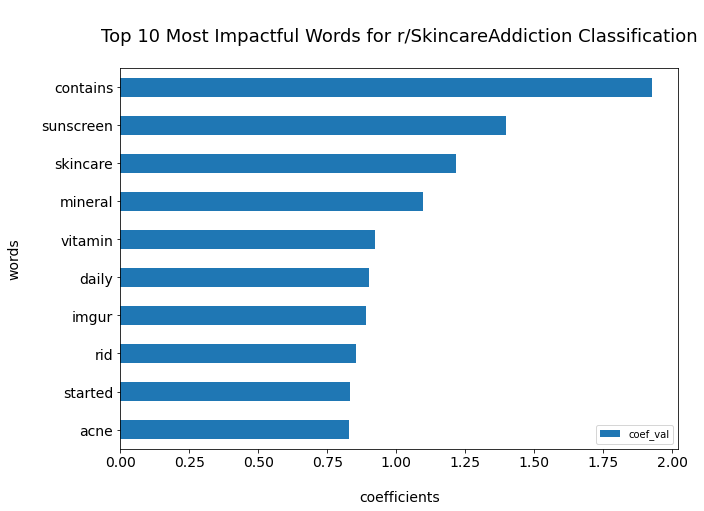

In [47]:
skin_10 = coef_df.sort_values(by='coef_val').tail(10)
skin_10.plot(kind='barh', figsize=(10,7))
plt.title('\nTop 10 Most Impactful Words for r/SkincareAddiction Classification\n', fontsize=18)
plt.xlabel('\ncoefficients', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('words\n', fontsize=14)
plt.yticks(fontsize=14);

**The higher the coefficient values, the more likely posts with the word were to be classified as a post in r/MakeupAddiction.**

<br>

#### r/MakeupAddiction

In [48]:
np.exp(coef_df.sort_values(by='coef_val').head(10).abs()) #makeupaddiction

,coef_val
makeup,8.128641
primer,4.294460
lipstick,3.373177
mascara,3.231776
setting,3.093934
foundation,2.927909
eyeliner,2.716019
look,2.698327
blush,2.695417
shade,2.540597


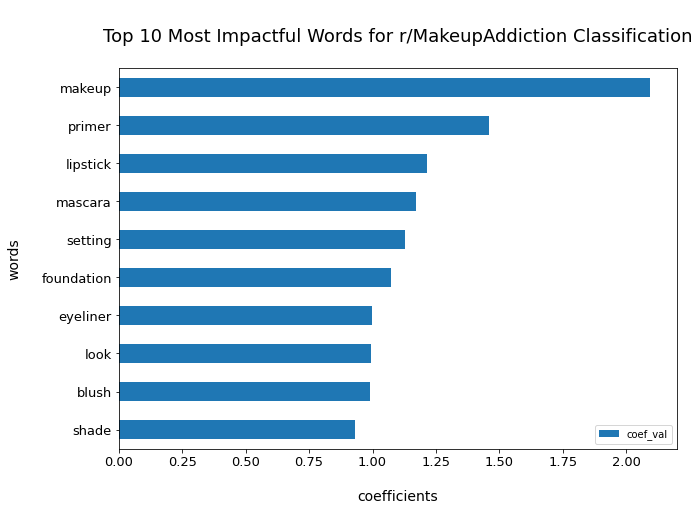

In [49]:
makeup_10 = coef_df.sort_values(by='coef_val').head(10).abs().iloc[::-1]
makeup_10.plot(kind='barh', figsize=(10,7))
plt.title('\nTop 10 Most Impactful Words for r/MakeupAddiction Classification\n', fontsize=18)
plt.xlabel('\ncoefficients', fontsize=14)
plt.xticks(fontsize=13)
plt.ylabel('words\n', fontsize=14)
plt.yticks(fontsize=13);

**The higher the coefficient values, the more likely posts with the word were to be classified as a post in r/MakeupAddiction.**

<br>

----
<br>

# Misclassifications
#### Gathering and analyzing the posts misclassified by the model.

In [35]:
test_preds = mnb2.predict(X2_test_cv)
pd.set_option('display.max_colwidth', None)

In [36]:
misclassifications = pd.DataFrame(X2_test)

misclassifications['pred class'] = test_preds
misclassifications['true class'] = y2_test

mis = misclassifications[misclassifications['pred class'] != misclassifications['true class']]
mis.head(5)

,selftext,pred class,true class
2431,Based on research this may be the perfect product for my face! But I cant seem to find it in stores or on Amazon directly from Eucerin — they are sold by third party retailers. I would love to know what’s a good trustworthy site to purchase Eucerin products?,MakeupAddiction,SkincareAddiction
6757,"Hey there,\n\nI'm keen on giving my eyebrows a little boost, and I read online that rosemary oil has similar effect to 2% minoxidil. Did a bit of googling and I couldn't find out whether I'm supposed to dilute the rosemary oil with a carrier oil or not. Does anyone know? I'm curious to hear about your experiences with rosemary oil+eyebrow growth in general :) \n\nThanks a lot :))",SkincareAddiction,MakeupAddiction
6890,"So I have normal to dry skin, but really dry in winter. I use all hydrating products (CeraVe hydrating face wash, hyaluronic acid applied on a damp face, FAB hydration cream, ceramide treatments at night sometimes). My skin is wayyy better than it was a couple years ago and looks and feels soft/smooth mostly with no makeup. \n\nThen, I go to put on even a tinted moisturizer, much less a powder or anything, and it highlights what looks like dry skin flecks/scales on my forehead that weren't noticeable w/o the makeup. I would just leave it bare since I go light on makeup, but I have a redness patch on my forehead that I like to even out. \n\nAny tips for how to get rid of this? I exfoliate a couple times a week with Neutrogena Hydroboost exfoliating face wash. I also use Niacinamide every time I wash my face, and retinol products a few times a week at night.",SkincareAddiction,MakeupAddiction
5698,"I am looking for a moisturizer for my skin. It is very acne-prone. I am also 4 months pregnant, so it cannot contain certain ingredients like retinol or salicylic acid no stronger than 2%. Thanks in advance!",SkincareAddiction,MakeupAddiction
276,"What are some products that are your favorites? Not looking for a particular type of product, just want some recommendations that are affordable cause I be broke.",MakeupAddiction,SkincareAddiction


<br>

### Confusion Matrix

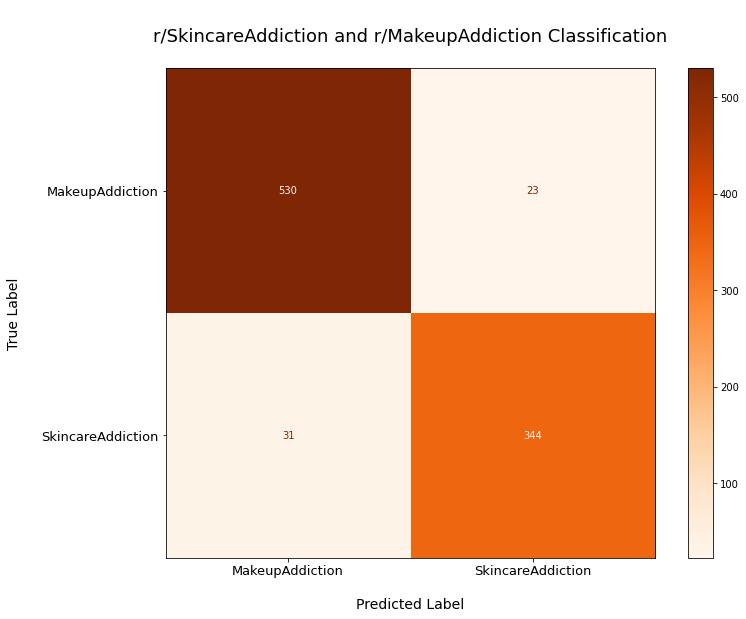

In [37]:
fig, ax = plt.subplots(figsize=(12, 9))

ConfusionMatrixDisplay.from_estimator(mnb2, X2_test_cv, y2_test, cmap='Oranges', ax=ax)

plt.title('\nr/SkincareAddiction and r/MakeupAddiction Classification\n', fontsize=18)
plt.xlabel('\nPredicted Label',fontsize=14)
plt.xticks(fontsize=13)
plt.ylabel('True Label\n', fontsize=14)
plt.yticks(fontsize=13);

<br>

### Wordcloud
#### Most common words among misclassified posts.

In [38]:
from wordcloud import WordCloud, STOPWORDS

In [39]:
text = ' '.join(misclassifications['selftext'])
wordcloud = WordCloud(stopwords = STOPWORDS,width=1000, height=400, min_font_size = 12, max_font_size=200, max_words=40,
                      background_color="white",
                      colormap = 'gist_heat',
                      min_word_length = 4).generate(text) #get rid of smaller words/parts of contractions that aren't descriptive

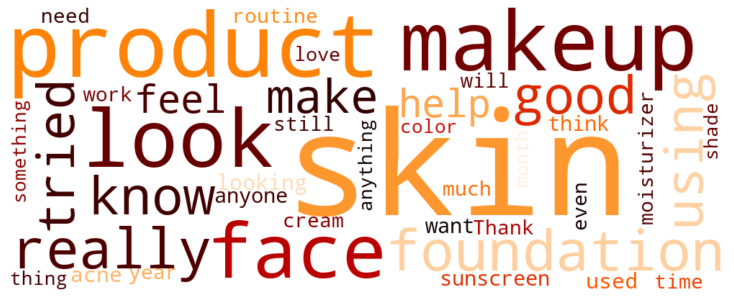

In [40]:
plt.figure(figsize=(12,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()